In [1]:
# Installing the Ultralytics library for YOLOv8, a state-of-the-art object detection  model
!pip install ultralytics

# Installing Roboflow to easily access our custom dataset
!pip install roboflow

# To create visualizations/confusion matrix
!pip install scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 773, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'predict', 'track', 'export', 'benchmark', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'segment', 'obb', 'pose', 'detect'}
                MODE (required) is one of {'val', 'predict', 'track', 'export', 'benchmark', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("drowsyproject").project("drowsiness_project")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [12]:
# Training
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 patience=5
'''
Here we run the YOLOv11 Medium (yolov11n.pt) pre-trained model in training mode for our custom dataset
The pre-trained model helps the model start from a solid foundation, with weights learned
from the large and well-known COCO dataset.

The dataset is specified through the data.yaml file, which contains information about the paths to
the training, validation, and test images.
'''

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drowsiness_project-4/data.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

'\nHere we run the YOLOv11 Medium (yolov11n.pt) pre-trained model in training mode for our custom dataset\nThe pre-trained model helps the model start from a solid foundation, with weights learned\nfrom the large and well-known COCO dataset.\n\nThe dataset is specified through the data.yaml file, which contains information about the paths to\nthe training, validation, and test images.\n'

In [13]:
# Making predictions on unseen data with Yolov8 Drowsy/Alert detection model on test dataset
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.55 source={dataset.location}/test/images save=True save_txt=True

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/526 /content/drowsiness_project-4/test/images/alert-6755167a-5447-11ef-9518-dd1b64d670e0_jpg.rf.41cf261e3b41971c2b46fe4bfb038498.jpg: 640x640 1 drowsy, 20.3ms
image 2/526 /content/drowsiness_project-4/test/images/alert-67802ad2-5447-11ef-acb2-dd1b64d670e0_jpg.rf.e752e281d384d569a4405b08a1901e4c.jpg: 640x640 1 drowsy, 16.2ms
image 3/526 /content/drowsiness_project-4/test/images/alert-67893d29-5447-11ef-923c-dd1b64d670e0_jpg.rf.cf7d091bea7334fc85a0d985951139d3.jpg: 640x640 1 drowsy, 15.7ms
image 4/526 /content/drowsiness_project-4/test/images/alert-679335f4-5447-11ef-8fa8-dd1b64d670e0_jpg.rf.53bee400648a9ac513ae39122a5db9d6.jpg: 640x640 1 drowsy, 13.7ms
image 5/526 /content/drowsiness_project-4/test/images/alert-67bece0e-5447-11ef-a15e-dd1b64d670e0_jpg.rf.e8197d9ab58ac24eb759f62a4a0d70c2.jpg: 640x640 (no detections), 

In [14]:
import os

# Define the paths for ground truth and predictions
ground_truth_folder = "/content/drowsiness_project-4/test/labels"
predictions_folder = "/content/runs/detect/predict2/labels/"  # Path where predictions are saved

# Initializing lists to hold ground truth and predictions
ground_truths = []
predictions = []

# Reading ground truth files
for txt_file in os.listdir(ground_truth_folder):
    if txt_file.endswith(".txt"):
        file_path = os.path.join(ground_truth_folder, txt_file)

        with open(file_path, 'r') as f:
            line = f.readline().strip()
            ground_truths.append(line)

# Reading prediction files
for txt_file in os.listdir(predictions_folder):
    if txt_file.endswith(".txt"):
        file_path = os.path.join(predictions_folder, txt_file)

        with open(file_path, 'r') as f:
            # Reading the best detection
            line = f.readline().strip() if f.readline() else "0"  # "0" indicates no detection
            predictions.append(line)

# Printing counts for verification
print(f"Ground Truths: {len(ground_truths)}")
print(f"Predictions: {len(predictions)}")


Ground Truths: 526
Predictions: 519


In [15]:
import os
from sklearn.metrics import confusion_matrix, classification_report

# Paths for ground truth and predictions
ground_truth_folder = "/content/drowsiness_project-4/test/labels"
predictions_folder = "/content/runs/detect/predict2/labels/"

# Initializing dictionaries to hold ground truth and predictions
ground_truths = {}
predictions = {}

# Reading ground truth files
for txt_file in os.listdir(ground_truth_folder):
    if txt_file.endswith(".txt"):
        file_path = os.path.join(ground_truth_folder, txt_file)
        with open(file_path, 'r') as f:
            line = f.readline().strip()  # Read the first line (the label + bounding box in YOLO format)
            if line:
                class_id = int(line.split()[0])  # Extract only the class ID (first value in line)
                ground_truths[txt_file] = class_id  # Store the class ID (0 or 1)
            else:
                ground_truths[txt_file] = -1  # Use -1 for no ground truth

# Reading prediction files
for txt_file in os.listdir(predictions_folder):
    if txt_file.endswith(".txt"):
        file_path = os.path.join(predictions_folder, txt_file)
        with open(file_path, 'r') as f:
            line = f.readline().strip()  # Reading the first line (the prediction in YOLO format)
            if line:
                class_id = int(line.split()[0])  # Extract the class ID (first value)
                predictions[txt_file] = class_id  # Storing the class ID (0 or 1)
            else:
                predictions[txt_file] = -1  # No detection made (empty file)

# Aligning the predictions with the ground truths and account for missing predictions
aligned_ground_truths = []
aligned_predictions = []

for txt_file, ground_truth in ground_truths.items():
    aligned_ground_truths.append(ground_truth)
    if txt_file in predictions:
        aligned_predictions.append(predictions[txt_file])
    else:
        aligned_predictions.append(-1)  # No prediction, treat as "no detection"

# Printing counts for verification
print(f"Aligned Ground Truths: {len(aligned_ground_truths)}")
print(f"Aligned Predictions: {len(aligned_predictions)}")

# Now we have these lists to create a confusion matrix and evaluate performance
y_true = aligned_ground_truths
y_pred = aligned_predictions

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, -1])  # Includes -1 for "no detection"

# Printing confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

# Printing a classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=[0, 1, -1], target_names=["Drowsy", "Alert", "No Detection"]))


Aligned Ground Truths: 526
Aligned Predictions: 526
Confusion Matrix:
[[241  16   6]
 [  1 261   1]
 [  0   0   0]]

Classification Report:
              precision    recall  f1-score   support

      Drowsy       1.00      0.92      0.95       263
       Alert       0.94      0.99      0.97       263
No Detection       0.00      0.00      0.00         0

    accuracy                           0.95       526
   macro avg       0.65      0.64      0.64       526
weighted avg       0.97      0.95      0.96       526



Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


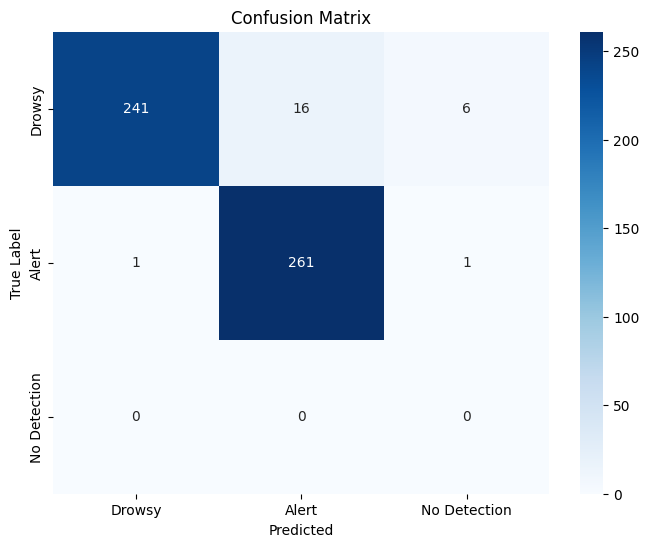

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, -1])  # Including -1 for "no detection"

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Drowsy", "Alert", "No Detection"], yticklabels=["Drowsy", "Alert", "No Detection"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()


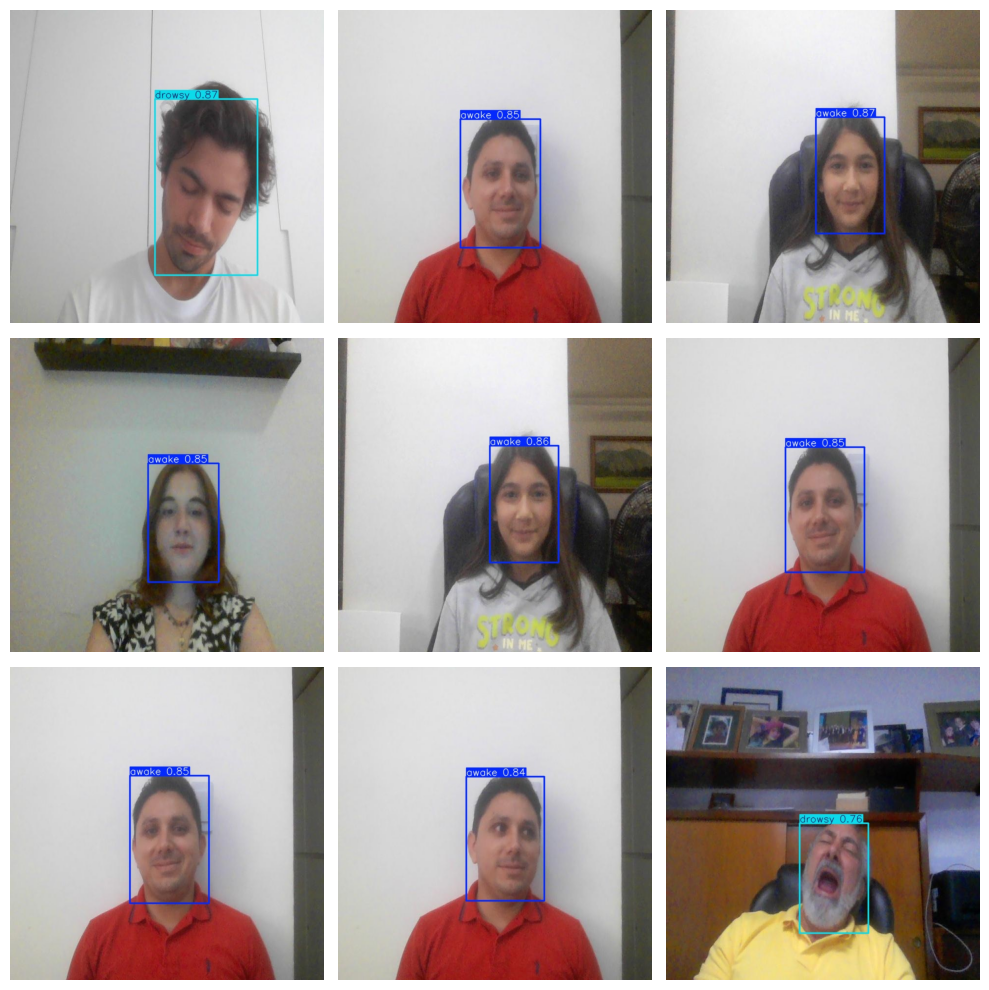

In [20]:
import matplotlib.pyplot as plt
from glob import glob
import random

# Get list of predicted images
images = glob('runs/detect/predict2/*.jpg')

# Randomly selecting 9 images
selected_images = random.sample(images, 9)

# Displaying the 9 images in a 3x3 grid
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(selected_images):
    plt.subplot(3, 3, i+1)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
